In [1]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import keras
from tensorflow.keras import layers

from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.4'

In [3]:
! ls

aa.ipynb			    equipment_success.csv
demo.ipynb			    equipment_success_unique.csv
equipment-success-yehonathan.ipynb  mlcc-exercises
equipment-success.ipynb		    mlcc-exercises_en.zip


In [6]:

equipment_success_dataframe = pd.read_csv("./equipment_success_unique.csv", sep=",")

equipment_success_dataframe['decades_old'] = round(equipment_success_dataframe['age_in_months_at_equipped_start'] / 120)

def isMale(x):
    if x == "male":
        return 1
    return 0
def isFemale(x):
    if x == "female":
        return 1
    return 0
def isRightEar(x):
    if x == "R":
        return 1
    return 0
def isLeftEar(x):
    if x == "L":
        return 1
    return 0
def isBothEars(x):
    if x == "BIN":
        return 1
    return 0
def dbToAmp (x):
    return 10**(x/20)


equipment_success_dataframe['isMale'] = equipment_success_dataframe['gender'].apply(isMale)
equipment_success_dataframe['isFemale'] = equipment_success_dataframe['gender'].apply(isFemale)
equipment_success_dataframe['isRightEar'] = equipment_success_dataframe['ears'].apply(isRightEar)
equipment_success_dataframe['isLeftEar'] = equipment_success_dataframe['ears'].apply(isLeftEar)
equipment_success_dataframe['isBothEars'] = equipment_success_dataframe['ears'].apply(isBothEars)

'''
equipment_success_dataframe['freq_500'] = dbToAmp(equipment_success_dataframe['freq_500'])
equipment_success_dataframe['freq_1000'] = dbToAmp(equipment_success_dataframe['freq_1000'])
equipment_success_dataframe['freq_2000'] = dbToAmp(equipment_success_dataframe['freq_2000'])
equipment_success_dataframe['freq_4000'] = dbToAmp(equipment_success_dataframe['freq_4000'])
equipment_success_dataframe['eq_freq_500'] = dbToAmp(equipment_success_dataframe['eq_freq_500'])
equipment_success_dataframe['eq_freq_1000'] = dbToAmp(equipment_success_dataframe['eq_freq_1000'])
equipment_success_dataframe['eq_freq_2000'] = dbToAmp(equipment_success_dataframe['eq_freq_2000'])
equipment_success_dataframe['eq_freq_4000'] = dbToAmp(equipment_success_dataframe['eq_freq_4000'])
'''

equipment_success_dataframe['freq_500_over_freq_1000'] = equipment_success_dataframe['freq_500']/equipment_success_dataframe['freq_1000']
equipment_success_dataframe['freq_2000_over_freq_1000'] = equipment_success_dataframe['freq_2000']/equipment_success_dataframe['freq_1000']
equipment_success_dataframe['freq_4000_over_freq_1000'] = equipment_success_dataframe['freq_4000']/equipment_success_dataframe['freq_1000']


equipment_success_dataframe['freq_500_gain'] = equipment_success_dataframe['freq_500'] - equipment_success_dataframe['eq_freq_500']
equipment_success_dataframe['freq_1000_gain'] = equipment_success_dataframe['freq_1000'] - equipment_success_dataframe['eq_freq_1000']
equipment_success_dataframe['freq_2000_gain'] = equipment_success_dataframe['freq_2000'] - equipment_success_dataframe['eq_freq_2000']
equipment_success_dataframe['freq_4000_gain'] = equipment_success_dataframe['freq_4000'] - equipment_success_dataframe['eq_freq_4000']

equipment_success_dataframe['freq_500_gain_ratio'] = equipment_success_dataframe['freq_500_gain'] / equipment_success_dataframe['freq_500']
equipment_success_dataframe['freq_1000_gain_ratio'] = equipment_success_dataframe['freq_1000_gain'] / equipment_success_dataframe['freq_1000']
equipment_success_dataframe['freq_2000_gain_ratio'] = equipment_success_dataframe['freq_2000_gain'] / equipment_success_dataframe['freq_2000']
equipment_success_dataframe['freq_4000_gain_ratio'] = equipment_success_dataframe['freq_4000_gain'] / equipment_success_dataframe['freq_4000']

# equipment_success_dataframe['eq_gain_ratio'] = (-equipment_success_dataframe['eq_average_loss'] + equipment_success_dataframe['average_loss'])/equipment_success_dataframe['average_loss']


equipment_success_dataframe = equipment_success_dataframe.drop(columns=["eq_average_loss", "eq_high_loss", "eq_low_loss", "rk", "ears", "gender"])

equipment_success_dataframe

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,freq_500,freq_1000,...,freq_2000_over_freq_1000,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio
0,51,14,0,nan,70.0,70.0,1516236,1069.0,nan,70.0,...,1.0,1.0,nan,-15.0,-15.0,nan,nan,-0.2,-0.2,nan
1,51,14,0,nan,55.0,55.0,1516232,1069.0,nan,55.0,...,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,58,199,24,32.5,42.5,13.3,1325097,1229.0,10.0,15.0,...,3.3,3.7,-5.0,-5.0,15.0,0.0,-0.5,-0.3,0.3,0.0
3,58,199,26,nan,45.0,45.0,1325104,1229.0,nan,45.0,...,nan,nan,nan,0.0,nan,nan,nan,0.0,nan,nan
4,496,27,46,61.2,70.0,51.7,1353472,929.0,60.0,45.0,...,1.3,1.8,30.0,15.0,25.0,30.0,0.5,0.3,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86171,288699,466,52,nan,0.0,0.0,1377261,965.0,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
86172,288711,883,0,41.2,40.0,36.2,1399353,883.0,40.0,30.0,...,1.3,1.8,15.0,15.0,20.0,10.0,0.4,0.5,0.5,0.2
86173,288715,773,0,nan,0.0,0.0,1333486,1097.0,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
86174,288718,1333,65,nan,0.0,0.0,1503159,611.0,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [8]:
equipment_success_dataframe['valid'] = (
    equipment_success_dataframe['freq_250'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_750'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_1000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_1500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_2000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_3000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_4000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_6000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_8000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_1000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_2000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_4000'].apply(lambda x : not math.isnan(x)) &
    
    equipment_success_dataframe['freq_500_gain'].apply(lambda x : not math.isnan(x) and x > 0) &
    equipment_success_dataframe['freq_1000_gain'].apply(lambda x : not math.isnan(x) and x > 0) &
    equipment_success_dataframe['freq_2000_gain'].apply(lambda x : not math.isnan(x) and x > 0) &
    equipment_success_dataframe['freq_4000_gain'].apply(lambda x : not math.isnan(x) and x > 0) &

        equipment_success_dataframe['freq_500_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
        equipment_success_dataframe['freq_1000_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
        equipment_success_dataframe['freq_2000_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
        equipment_success_dataframe['freq_4000_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
    
        equipment_success_dataframe['isBothEars'].apply(lambda x : x == 0) &


     equipment_success_dataframe['average_loss'].apply(lambda x : not math.isnan(x)) &
#     equipment_success_dataframe['high_loss'].apply(lambda x : not math.isnan(x)) &
#     equipment_success_dataframe['low_loss'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['months_since_equipped'].apply(lambda x : x > 12) &
    equipment_success_dataframe['decades_old'].apply(lambda x : not math.isnan(x) and x < 11 and x > 4)
)

In [9]:
#equipment_success = equipment_success_dataframe.query('center_id == 29 and valid == True').copy()
equipment_success_valid = equipment_success_dataframe.query(' valid == True').copy()

equipment_success_valid

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,freq_500,freq_1000,...,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio,valid
30,815,36,109,55.0,67.1,52.0,1512505,752.0,45.0,50.0,...,1.2,20.0,20.0,25.0,5.0,0.4,0.4,0.4,0.1,True
31,815,36,109,102.5,103.6,95.0,1514893,752.0,95.0,105.0,...,1.0,75.0,80.0,70.0,50.0,0.8,0.8,0.7,0.5,True
40,882,32,34,38.8,51.4,25.0,1334788,853.0,25.0,30.0,...,1.8,5.0,10.0,20.0,20.0,0.2,0.3,0.4,0.4,True
43,916,66,44,53.8,61.4,39.0,1430574,789.0,40.0,60.0,...,0.9,5.0,20.0,20.0,15.0,0.1,0.3,0.3,0.3,True
44,916,66,44,53.8,58.6,40.0,1427864,789.0,40.0,60.0,...,1.0,5.0,20.0,15.0,20.0,0.1,0.3,0.3,0.3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86127,288339,1145,31,56.2,64.3,53.0,1435970,1083.0,50.0,55.0,...,1.1,10.0,20.0,30.0,25.0,0.2,0.4,0.5,0.4,True
86132,288373,66,79,63.8,73.6,59.0,1428599,726.0,55.0,60.0,...,1.2,25.0,35.0,45.0,35.0,0.5,0.6,0.6,0.5,True
86133,288373,66,76,72.5,87.9,54.0,1426962,728.0,50.0,60.0,...,1.6,20.0,30.0,55.0,50.0,0.4,0.5,0.6,0.5,True
86148,288500,56,84,61.2,76.4,41.2,1520183,868.0,35.0,55.0,...,1.5,5.0,25.0,40.0,40.0,0.1,0.5,0.6,0.5,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a21834e0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a1860cc0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a18125f8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a1839ef0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a179b780>]],
      dtype=object)

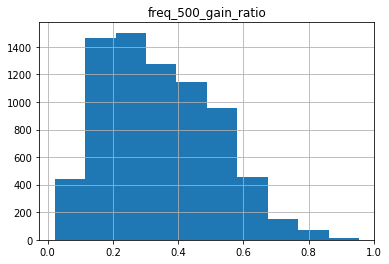

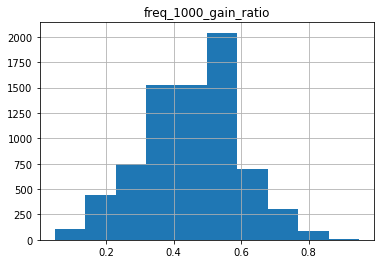

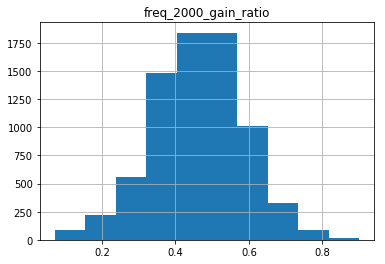

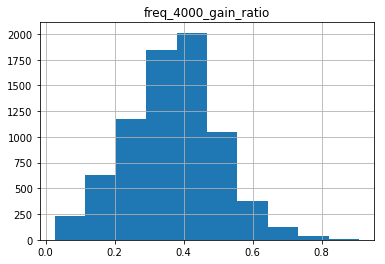

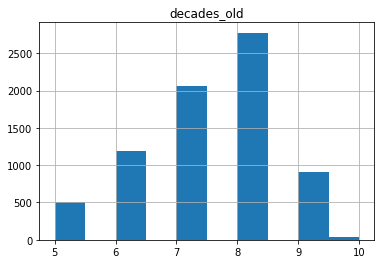

In [10]:
for feature in ['freq_500_gain_ratio', 'freq_1000_gain_ratio', 'freq_2000_gain_ratio', 'freq_4000_gain_ratio', 'decades_old']:
    display.display(equipment_success_valid.hist(feature))

In [11]:
def scaleInner(df, feature):
    stats = df[feature].describe();
    std = stats['std']
    mean = stats['mean']
    df[feature + '_scaled'] = (df[feature] - mean)/std
    return df

def scale(df, features):
    scaledDf = df.copy()
    for feature in features:
        scaleInner(scaledDf, feature)
    return scaledDf        

In [12]:
def success_ratio(equipment_success, freq, multiplier, threshold ):
    data = pd.value_counts(
        equipment_success['freq_' + freq + '_gain'] > (equipment_success['freq_' + freq] * multiplier) - threshold
    )  
    return data[True]/(data[False] + data[True])

In [13]:
[success_ratio(equipment_success_valid, '500', 0.5, 5),
success_ratio(equipment_success_valid, '1000', 0.5, 5),
success_ratio(equipment_success_valid, '2000', 0.5, 5),
success_ratio(equipment_success_valid, '4000', 0.5, 5)]

[0.31462175888799787,
 0.5879443998930767,
 0.5989040363539161,
 0.29363806468858594]

In [14]:
def model_good_prediction_ratio(targets, predictions, max_distance):
    predictionsDiff = (targets - predictions).apply (lambda x: abs(x))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [15]:
equipment_success = equipment_success_valid.copy() #[(equipment_success_valid['isMale'] == 0)
                                           # & (equipment_success_valid['decades_old'] == 7)
                                           #].copy()

equipment_success

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,freq_500,freq_1000,...,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio,valid
30,815,36,109,55.0,67.1,52.0,1512505,752.0,45.0,50.0,...,1.2,20.0,20.0,25.0,5.0,0.4,0.4,0.4,0.1,True
31,815,36,109,102.5,103.6,95.0,1514893,752.0,95.0,105.0,...,1.0,75.0,80.0,70.0,50.0,0.8,0.8,0.7,0.5,True
40,882,32,34,38.8,51.4,25.0,1334788,853.0,25.0,30.0,...,1.8,5.0,10.0,20.0,20.0,0.2,0.3,0.4,0.4,True
43,916,66,44,53.8,61.4,39.0,1430574,789.0,40.0,60.0,...,0.9,5.0,20.0,20.0,15.0,0.1,0.3,0.3,0.3,True
44,916,66,44,53.8,58.6,40.0,1427864,789.0,40.0,60.0,...,1.0,5.0,20.0,15.0,20.0,0.1,0.3,0.3,0.3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86127,288339,1145,31,56.2,64.3,53.0,1435970,1083.0,50.0,55.0,...,1.1,10.0,20.0,30.0,25.0,0.2,0.4,0.5,0.4,True
86132,288373,66,79,63.8,73.6,59.0,1428599,726.0,55.0,60.0,...,1.2,25.0,35.0,45.0,35.0,0.5,0.6,0.6,0.5,True
86133,288373,66,76,72.5,87.9,54.0,1426962,728.0,50.0,60.0,...,1.6,20.0,30.0,55.0,50.0,0.4,0.5,0.6,0.5,True
86148,288500,56,84,61.2,76.4,41.2,1520183,868.0,35.0,55.0,...,1.5,5.0,25.0,40.0,40.0,0.1,0.5,0.6,0.5,True


## Keras

In [16]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras import optimizers



In [17]:
keras.__version__

'2.2.4'

In [18]:
def model_good_prediction_ratio_array(targets, predictions, max_distance):
    predictionsDiff = list(map(lambda x: abs(x), list(targets - predictions)))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [19]:
equipment_success_valid = scale(equipment_success_valid, ['freq_250', 'freq_500', 'freq_750', 'freq_1000', 
                                                          'freq_1500', 'freq_2000', 'freq_3000', 'freq_4000',
                                                          'freq_6000', 'freq_8000', 'decades_old', 'age_in_months_at_equipped_start'])


equipment_success_all = equipment_success_valid.copy()
#[(equipment_success_valid['isFemale'] == 1)
#                                            & (equipment_success_valid['decades_old'] == 8)
#                                           ].copy()

equipment_success = equipment_success_all.sample(frac=1)
equipment_success = equipment_success.head(1000)
 
equipment_success

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,freq_500,freq_1000,...,freq_750_scaled,freq_1000_scaled,freq_1500_scaled,freq_2000_scaled,freq_3000_scaled,freq_4000_scaled,freq_6000_scaled,freq_8000_scaled,decades_old_scaled,age_in_months_at_equipped_start_scaled
35806,173335,643,14,51.2,57.1,45.0,1312675,1016.0,50.0,55.0,...,-0.8,-0.1,-0.3,-0.8,-1.1,-1.2,-0.1,-0.9,0.6,1.1
43716,187205,240,35,66.2,78.6,52.5,1394611,925.0,45.0,65.0,...,0.0,0.5,1.1,0.8,0.5,0.6,0.8,0.3,0.6,0.4
58601,215728,29,47,62.5,77.1,43.0,1471674,988.0,40.0,55.0,...,-0.5,-0.1,0.5,0.4,0.8,0.9,0.2,1.2,0.6,0.8
85078,284175,1324,20,76.2,76.4,78.0,1501363,987.0,80.0,75.0,...,1.4,1.1,0.8,0.4,0.5,0.6,0.2,-0.0,0.6,0.8
70142,241283,1103,31,51.2,51.4,40.0,1488646,694.0,45.0,55.0,...,0.0,-0.1,-0.3,-0.2,-0.8,-1.6,-1.3,-2.7,-1.2,-1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,42069,156,107,86.2,87.1,81.0,1417665,876.0,80.0,85.0,...,1.7,1.6,1.4,1.7,1.1,1.2,0.8,0.3,-0.3,-0.0
10689,125619,186,15,53.8,64.3,36.0,1510604,1001.0,30.0,50.0,...,-1.1,-0.4,0.2,0.4,-0.1,-0.3,-0.7,-0.6,0.6,0.9
19355,141912,106,24,35.0,42.1,31.2,1293462,639.0,30.0,35.0,...,-1.1,-1.2,-1.8,-2.1,-1.7,-1.6,-1.0,-1.5,-2.1,-1.9
46540,192376,508,57,53.8,55.7,45.0,1390956,682.0,50.0,50.0,...,-0.2,-0.4,-0.6,-0.8,-0.4,-0.3,-1.3,-1.2,-1.2,-1.5


In [20]:
features = [
   "age_in_months_at_equipped_start_scaled",
    "isMale",
    "isFemale",
    "isLeftEar",
    "isRightEar",
    'freq_250_scaled',
    'freq_500_scaled',
    'freq_750_scaled',
    'freq_1000_scaled',
    'freq_1500_scaled',
    'freq_2000_scaled',
    'freq_3000_scaled', 
    'freq_4000_scaled',
    'freq_6000_scaled',
    'freq_8000_scaled',
    #'freq_500_over_freq_1000',
    #'freq_2000_over_freq_1000',
    #'freq_4000_over_freq_1000'
    
]

data = (equipment_success[features].values)
labels = (equipment_success['eq_freq_2000'].values)

model_good_prediction_ratio_array(labels, np.average(labels), 5)

0.55

In [58]:


model = Sequential([
    Dense(15, input_dim=len(features)),
    Activation('sigmoid'),
    Dense(15, input_dim=15),
    Activation('sigmoid'),
   Dense(15, input_dim=9),
    Activation('sigmoid'),
    Dense(1),
])


sgd = optimizers.SGD(lr=0.05)


model.compile(optimizer=sgd,
              loss='mean_squared_error',       
              metrics=['mean_squared_error'])  


                         


history = model.fit(data, labels, epochs=200, batch_size=None,steps_per_epoch=100,
          validation_split=0.2, 
                    validation_steps=100,
                   verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/200
100/100 [==============================] - 1s 6ms/step - loss: 79.2173 - mean_squared_error: 79.2173 - val_loss: 68.7703 - val_mean_squared_error: 68.7703
Epoch 2/200
100/100 [==============================] - 0s 4ms/step - loss: 55.3478 - mean_squared_error: 55.3478 - val_loss: 50.3094 - val_mean_squared_error: 50.3094
Epoch 3/200
100/100 [==============================] - 0s 4ms/step - loss: 53.2023 - mean_squared_error: 53.2023 - val_loss: 49.8251 - val_mean_squared_error: 49.8251
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 50.3465 - mean_squared_error: 50.3465 - val_loss: 48.3308 - val_mean_squared_error: 48.3308
Epoch 5/200
100/100 [==============================] - 0s 4ms/step - loss: 48.0343 - mean_squared_error: 48.0343 - val_loss: 48.6110 - val_mean_squared_error: 48.6110
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 46.7087 - mean_squared_error: 46.7087 - val_

100/100 [==============================] - 0s 3ms/step - loss: 18.9750 - mean_squared_error: 18.9750 - val_loss: 75.9308 - val_mean_squared_error: 75.9308
Epoch 50/200
100/100 [==============================] - 0s 3ms/step - loss: 18.7115 - mean_squared_error: 18.7115 - val_loss: 76.3646 - val_mean_squared_error: 76.3646
Epoch 51/200
100/100 [==============================] - 0s 3ms/step - loss: 18.4162 - mean_squared_error: 18.4162 - val_loss: 76.8582 - val_mean_squared_error: 76.8582
Epoch 52/200
100/100 [==============================] - 0s 3ms/step - loss: 18.1796 - mean_squared_error: 18.1796 - val_loss: 77.1867 - val_mean_squared_error: 77.1867
Epoch 53/200
100/100 [==============================] - 0s 3ms/step - loss: 17.9266 - mean_squared_error: 17.9266 - val_loss: 77.5042 - val_mean_squared_error: 77.5042
Epoch 54/200
100/100 [==============================] - 0s 3ms/step - loss: 17.7073 - mean_squared_error: 17.7073 - val_loss: 77.8220 - val_mean_squared_error: 77.8220
Epoch

Epoch 98/200
100/100 [==============================] - 0s 3ms/step - loss: 9.8316 - mean_squared_error: 9.8316 - val_loss: 80.4341 - val_mean_squared_error: 80.4341
Epoch 99/200
100/100 [==============================] - 0s 3ms/step - loss: 9.6894 - mean_squared_error: 9.6894 - val_loss: 80.5432 - val_mean_squared_error: 80.5432
Epoch 100/200
100/100 [==============================] - 0s 3ms/step - loss: 9.6537 - mean_squared_error: 9.6537 - val_loss: 81.2968 - val_mean_squared_error: 81.2968
Epoch 101/200
100/100 [==============================] - 0s 3ms/step - loss: 9.4290 - mean_squared_error: 9.4290 - val_loss: 80.8581 - val_mean_squared_error: 80.8581
Epoch 102/200
100/100 [==============================] - 0s 3ms/step - loss: 9.4476 - mean_squared_error: 9.4476 - val_loss: 82.6288 - val_mean_squared_error: 82.6288
Epoch 103/200
100/100 [==============================] - 0s 3ms/step - loss: 9.3188 - mean_squared_error: 9.3188 - val_loss: 81.3465 - val_mean_squared_error: 81.3465


100/100 [==============================] - 0s 3ms/step - loss: 6.9208 - mean_squared_error: 6.9208 - val_loss: 85.7051 - val_mean_squared_error: 85.7051
Epoch 148/200
100/100 [==============================] - 0s 3ms/step - loss: 6.7245 - mean_squared_error: 6.7245 - val_loss: 85.9571 - val_mean_squared_error: 85.9571
Epoch 149/200
100/100 [==============================] - 0s 3ms/step - loss: 6.9721 - mean_squared_error: 6.9721 - val_loss: 84.8145 - val_mean_squared_error: 84.8145
Epoch 150/200
100/100 [==============================] - 0s 4ms/step - loss: 6.6874 - mean_squared_error: 6.6874 - val_loss: 86.4048 - val_mean_squared_error: 86.4048
Epoch 151/200
100/100 [==============================] - 0s 3ms/step - loss: 6.6816 - mean_squared_error: 6.6816 - val_loss: 85.1217 - val_mean_squared_error: 85.1217
Epoch 152/200
100/100 [==============================] - 0s 3ms/step - loss: 6.5442 - mean_squared_error: 6.5442 - val_loss: 85.1795 - val_mean_squared_error: 85.1795
Epoch 153/20

100/100 [==============================] - 0s 3ms/step - loss: 5.4040 - mean_squared_error: 5.4040 - val_loss: 96.2734 - val_mean_squared_error: 96.2734
Epoch 197/200
100/100 [==============================] - 0s 3ms/step - loss: 6.0505 - mean_squared_error: 6.0505 - val_loss: 90.7258 - val_mean_squared_error: 90.7258
Epoch 198/200
100/100 [==============================] - 0s 3ms/step - loss: 5.4301 - mean_squared_error: 5.4301 - val_loss: 95.4555 - val_mean_squared_error: 95.4555
Epoch 199/200
100/100 [==============================] - 0s 3ms/step - loss: 5.4164 - mean_squared_error: 5.4164 - val_loss: 95.6419 - val_mean_squared_error: 95.6419
Epoch 200/200
100/100 [==============================] - 0s 4ms/step - loss: 5.5833 - mean_squared_error: 5.5833 - val_loss: 97.1562 - val_mean_squared_error: 97.1562


In [55]:
np.std(labels - np.average(labels))

8.42432169376265

In [56]:
from operator import itemgetter

a, b = min(enumerate(history.history['loss']), key=itemgetter(1)) 
[a, math.sqrt(b)]

[197, 3.401708574711303]

In [57]:
predictions = model.predict(data).transpose()[0]
[model_good_prediction_ratio_array(labels, predictions, 5),
 model_good_prediction_ratio_array(labels, np.average(labels), 5)]


[0.792, 0.55]

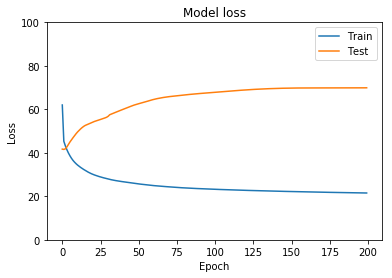

In [44]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylim(0, 100)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [23]:
test_dataset = equipment_success_all.copy() #[(equipment_success_valid['isMale'] == 0)
                                           # & (equipment_success_valid['decades_old'] == 7)
                                           #].copy()
        
test_dataset = test_dataset.sample(frac=1)
test_dataset = test_dataset.tail(1000)
test_data = (test_dataset[features].values)
test_labels = (test_dataset['eq_freq_2000'].values)

test_predictions = model.predict(test_data).transpose()[0]
[model_good_prediction_ratio_array(test_labels, test_predictions, 5),
 model_good_prediction_ratio_array(test_labels, np.average(test_labels), 5)]


[0.548, 0.541]

In [24]:
test_labels - test_predictions

array([ 2.05080795e+00, -7.94754410e+00, -1.29538536e+01, -2.95101547e+00,
        3.27393723e+00,  8.27403069e+00, -2.28575363e+01, -1.57872200e+00,
        4.10610580e+00, -6.93192291e+00,  2.07655716e+00, -2.19954643e+01,
       -2.95190430e+00,  3.52158165e+00, -1.57377625e+00,  3.27444458e+00,
       -2.95045471e+00,  2.04628754e+00, -1.82958221e+00, -1.72612762e+00,
       -7.61500168e+00, -1.73098564e+00,  2.04937744e+00,  3.27481079e+00,
        1.47110004e+01,  1.25687962e+01, -1.72239685e+00,  1.32738705e+01,
       -3.20412064e+00,  8.34257889e+00, -2.95625305e+00,  2.74271011e-01,
       -1.73409271e+00, -1.72612953e+00, -1.29504852e+01,  7.04953384e+00,
        3.12254906e+00, -1.67822075e+00, -7.96102142e+00,  4.94232178e-02,
       -1.19523697e+01,  2.30931072e+01,  1.32749939e+01, -2.95349121e+00,
       -3.82720566e+00,  3.26380539e+00,  2.00729370e+00, -7.95290375e+00,
        3.72333717e+00,  2.04780197e+00, -2.95038605e+00, -1.70900726e+00,
        3.27503395e+00,  